In [1]:
import numpy as np

In [2]:
import Var_Quar_Pot_Act

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib nbagg

In [5]:
import scipy.optimize as sco

In [6]:
import scipy.interpolate as sci

First let us get a general idea of how $S$ vs. $\alpha$ looks like for all $\alpha$ between 0.5 and 0.75.
This is for a purely dimensionless system. Running the below code takes a lot of time. The purpose of this notebook is to create a template for us to use in future, to save us time and computational resources.

In [7]:
alpha_eff_array = np.linspace(0.5, 0.75, 201)[::-1]

In [8]:
alpha_eff_array

array([0.75   , 0.74875, 0.7475 , 0.74625, 0.745  , 0.74375, 0.7425 ,
       0.74125, 0.74   , 0.73875, 0.7375 , 0.73625, 0.735  , 0.73375,
       0.7325 , 0.73125, 0.73   , 0.72875, 0.7275 , 0.72625, 0.725  ,
       0.72375, 0.7225 , 0.72125, 0.72   , 0.71875, 0.7175 , 0.71625,
       0.715  , 0.71375, 0.7125 , 0.71125, 0.71   , 0.70875, 0.7075 ,
       0.70625, 0.705  , 0.70375, 0.7025 , 0.70125, 0.7    , 0.69875,
       0.6975 , 0.69625, 0.695  , 0.69375, 0.6925 , 0.69125, 0.69   ,
       0.68875, 0.6875 , 0.68625, 0.685  , 0.68375, 0.6825 , 0.68125,
       0.68   , 0.67875, 0.6775 , 0.67625, 0.675  , 0.67375, 0.6725 ,
       0.67125, 0.67   , 0.66875, 0.6675 , 0.66625, 0.665  , 0.66375,
       0.6625 , 0.66125, 0.66   , 0.65875, 0.6575 , 0.65625, 0.655  ,
       0.65375, 0.6525 , 0.65125, 0.65   , 0.64875, 0.6475 , 0.64625,
       0.645  , 0.64375, 0.6425 , 0.64125, 0.64   , 0.63875, 0.6375 ,
       0.63625, 0.635  , 0.63375, 0.6325 , 0.63125, 0.63   , 0.62875,
       0.6275 , 0.62

In [9]:
file = open("S_alpha_template_alpha_vals.txt", "w+")
for i in alpha_eff_array:
    file.write(str(i) + " \n")
file.close()

First lets do dof=3

In [10]:
dof=3

Have copied below code from Act_Temp

In [11]:
compare1 = list(abs(alpha_eff_array - 0.506))
find_index1 = compare1.index(min(compare1))
if alpha_eff_array[find_index1] > 0.506:
    find_index1 = find_index1 + 1

compare2 = list(abs(alpha_eff_array - 0.513))
find_index2 = compare2.index(min(compare2))
if alpha_eff_array[find_index2] < 0.513:
    find_index2 = find_index2 - 1

In [12]:
a1_3 = list(alpha_eff_array)[:(find_index2 + 1)]
a2_3 = list(alpha_eff_array)[find_index1:] 
a3_3 = list(alpha_eff_array)[(find_index2 + 1):find_index1]

In [13]:
if 0.5 in a2_3:
    find_index3 = a2_3.index(0.5)
    a2_3[find_index3] = 0.500001
    
s_vals = []
r_vals = []
p_vals = []

linear_bound_l = []
linear_bound_u = []
    
print("#     Alpha     S       R     Phi_0")
for a in a1_3:
    s, r, phi_0 = Var_Quar_Pot_Act.get_S(a, D=dof)
    s_vals.append(s)
    r_vals.append(r)
    p_vals.append(phi_0)
    print((len(s_vals), a, s_vals[-1], r_vals[-1], p_vals[-1]))
    if a == a1_3[-1]:
        linear_bound_u.append(a)
        linear_bound_u.append(s)
        linear_bound_u.append(r)
    
s_buffer, r_buffer, phi_0_buffer = Var_Quar_Pot_Act.get_S(a2_3[0], D=dof)
linear_bound_l.append(a2_3[0])
linear_bound_l.append(s_buffer)
linear_bound_l.append(r_buffer)
    
for a in a3_3:
    s, r, phi_0 = Var_Quar_Pot_Act.get_S(a, al_506= linear_bound_l, al_513= linear_bound_u, D=dof)
    s_vals.append(s)
    r_vals.append(r)
    p_vals.append(phi_0)
    print((len(s_vals), a, s_vals[-1], r_vals[-1], p_vals[-1]))
    
s_vals.append(s_buffer)
r_vals.append(r_buffer)
p_vals.append(phi_0_buffer)
print((len(s_vals), a2_3[0], s_vals[-1], r_vals[-1], p_vals[-1]))
    
for a in a2_3[1:]:
    s, r, phi_0 = Var_Quar_Pot_Act.get_S(a, D=dof)
    s_vals.append(s)
    r_vals.append(r)
    p_vals.append(phi_0)
    print((len(s_vals), a, s_vals[-1], r_vals[-1], p_vals[-1]))

#     Alpha     S       R     Phi_0
(1, 0.75, 0.00635541631840881, array(13.58195569), 0.02490234375)
(2, 0.74875, 0.008890135169755772, array(13.42182291), 0.028805842966435354)
(3, 0.7475, 0.012233215147163657, array(13.17555136), 0.03319700621636297)
(4, 0.74625, 0.015968546058454425, array(12.968955), 0.03758755463398578)
(5, 0.745, 0.020576296128932844, array(12.68833536), 0.04246085221655281)
(6, 0.74375, 0.025564585515385166, array(12.44655949), 0.04733105685698259)
(7, 0.7424999999999999, 0.031457158720759604, array(12.1414294), 0.05267903067784099)
(8, 0.74125, 0.03771851661085036, array(11.87364228), 0.05802138646410306)
(9, 0.74, 0.044908571427601435, array(11.55304366), 0.06383646503151261)
(10, 0.73875, 0.052466568445008, array(11.2685347), 0.06964335241220149)
(11, 0.7375, 0.06098446130822207, array(10.94220227), 0.07591784842334888)
(12, 0.7362500000000001, 0.06988146001578403, array(10.65112243), 0.08218153092519728)
(13, 0.735, 0.07915699155094771, array(10.3897384), 0

(112, 0.61125, 5.74356794035919, array(5.60912141), 0.8143855048756519)
(113, 0.61, 5.912498143232069, array(5.63097719), 0.8205591872552978)
(114, 0.60875, 6.086993831881223, array(5.65391474), 0.8266580683284273)
(115, 0.6075, 6.267292093010734, array(5.67796101), 0.8326795865016969)
(116, 0.60625, 6.453677735277999, array(5.70313818), 0.8386224407583577)
(117, 0.605, 6.646382795914358, array(5.72948152), 0.8444829755506036)
(118, 0.60375, 6.845748019011854, array(5.75701558), 0.8502599972834477)
(119, 0.6025, 7.052065658075653, array(5.78577544), 0.8559505795416825)
(120, 0.6012500000000001, 7.265680609660375, array(5.8157916), 0.861553043390579)
(121, 0.6, 7.4869393724700775, array(5.84710175), 0.8670645991538234)
(122, 0.59875, 7.716221899688533, array(5.87974266), 0.8724831147046349)
(123, 0.5975, 7.953905873151447, array(5.91375507), 0.8778059534584715)
(124, 0.59625, 8.200461262021047, array(5.94917727), 0.8830316971046868)
(125, 0.595, 8.456296620301536, array(5.98605635), 0.8

In [14]:
file = open("S_alpha_template_dof_3_S_vals.txt", "w+")
for i in s_vals:
    file.write(str(i) + " \n")
file.close()

file = open("S_alpha_template_dof_3_R_vals.txt", "w+")
for i in r_vals:
    file.write(str(i) + " \n")
file.close()

file = open("S_alpha_template_dof_3_Phi_vals.txt", "w+")
for i in p_vals:
    file.write(str(i) + " \n")
file.close()

<IPython.core.display.Javascript object>


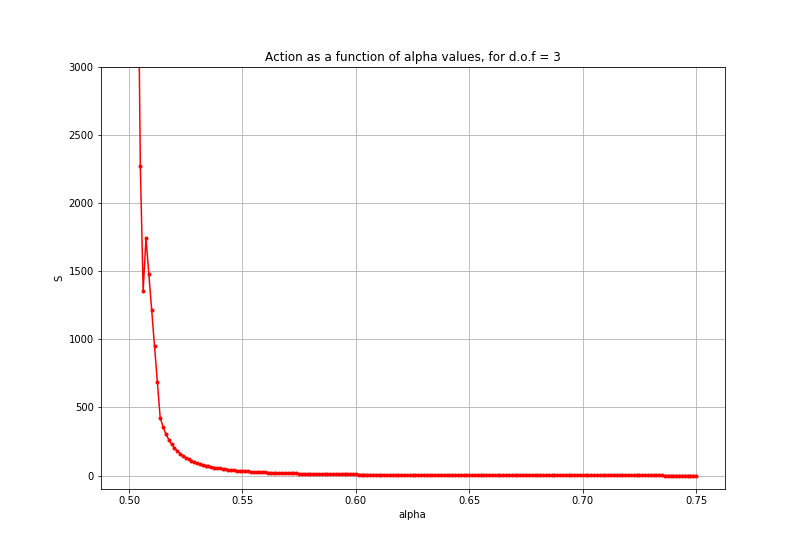

Last 4 values are off screen and the graph *seems* vertical there, as graph asymptoically tends to infinity 
as alpha tends to 0.5


In [15]:
plt.close()
plt.plot(alpha_eff_array, s_vals, 'r.-')
plt.title("Action as a function of alpha values, for d.o.f = 3")
plt.xlabel("alpha")
plt.ylabel("S")
plt.ylim(-100, 3000)
plt.grid(True)
print("Last 4 values are off screen and the graph *seems* vertical there, as graph asymptoically tends to infinity \nas alpha tends to 0.5")

In [16]:
plt.close()

Now we do dof=4

In [26]:
dof=4

In [13]:
compare3 = list(abs(alpha_eff_array - 0.522))
find_index4 = compare3.index(min(compare3))
if alpha_eff_array[find_index4] < 0.522:
    find_index4 = find_index4 - 1

In [14]:
a1_4 = list(alpha_eff_array)[:(find_index4 + 1)]
a2_4 = list(alpha_eff_array)[find_index1:] 
a3_4 = list(alpha_eff_array)[(find_index4 + 1):find_index1]

In [29]:
if 0.5 in a2_4:
    find_index5 = a2_4.index(0.5)
    a2_4[find_index5] = 0.500001

s_vals = []
r_vals = []
p_vals = []

linear_bound_l = []
linear_bound_u = []
    
print("#     Alpha     S       R     Phi_0")
for a in a1_4:
    s, r, phi_0 = Var_Quar_Pot_Act.get_S(a, D=dof)
    s_vals.append(s)
    r_vals.append(r)
    p_vals.append(phi_0)
    print((len(s_vals), a, s_vals[-1], r_vals[-1], p_vals[-1]))
    if a == a1_4[-1]:
        linear_bound_u.append(a)
        linear_bound_u.append(s)
        linear_bound_u.append(r)
    
s_buffer, r_buffer, phi_0_buffer = Var_Quar_Pot_Act.get_S(a2_4[0], D=dof)
linear_bound_l.append(a2_4[0])
linear_bound_l.append(s_buffer)
linear_bound_l.append(r_buffer)
    
for a in a3_4:
    s, r, phi_0 = Var_Quar_Pot_Act.get_S(a, al_506= linear_bound_l, al_513= linear_bound_u, D=dof)
    s_vals.append(s)
    r_vals.append(r)
    p_vals.append(phi_0)
    print((len(s_vals), a, s_vals[-1], r_vals[-1], p_vals[-1]))
    
s_vals.append(s_buffer)
r_vals.append(r_buffer)
p_vals.append(phi_0_buffer)
print((len(s_vals), a2_4[0], s_vals[-1], r_vals[-1], p_vals[-1]))
    
for a in a2_4[1:]:
    s, r, phi_0 = Var_Quar_Pot_Act.get_S(a, D=dof)
    s_vals.append(s)
    r_vals.append(r)
    p_vals.append(phi_0)
    print((len(s_vals), a, s_vals[-1], r_vals[-1], p_vals[-1]))

#     Alpha     S       R     Phi_0
(1, 0.75, 0.5579877540205037, array(12.27690149), 0.052734375)
(2, 0.74875, 0.7013696567730734, array(11.96055295), 0.05997757117613853)
(3, 0.7475, 0.8488444766388489, array(11.68403824), 0.06720515172634016)
(4, 0.74625, 1.020959994995555, array(11.35293633), 0.07538623073597425)
(5, 0.745, 1.216490320880732, array(10.98241913), 0.08451330343167646)
(6, 0.74375, 1.4137900511551058, array(10.65682974), 0.09361456826474052)
(7, 0.7424999999999999, 1.6332148142197678, array(10.30360795), 0.10365163105761198)
(8, 0.74125, 1.8742936654315114, array(9.93448796), 0.11461684287817428)
(9, 0.74, 2.11719734655853, array(9.61005367), 0.12554576294205674)
(10, 0.73875, 2.3625773046192777, array(9.322191), 0.1364381886492742)
(11, 0.7375, 2.630806114414116, array(9.0230584), 0.14824559664150078)
(12, 0.7362500000000001, 2.902798940231427, array(8.75694895), 0.1600110184785932)
(13, 0.735, 3.1791907822848295, array(8.51846571), 0.17173421707211872)
(14, 0.73375,

(113, 0.61, 169.68486626737553, array(6.8558832), 0.9478749853424724)
(114, 0.60875, 176.08849169477804, array(6.90685811), 0.9505458226730932)
(115, 0.6075, 182.78821167529077, array(6.95923491), 0.9531299905125967)
(116, 0.60625, 189.79969419228618, array(7.01305116), 0.9556272007736137)
(117, 0.605, 197.1416673425305, array(7.06834828), 0.9580383992519228)
(118, 0.60375, 204.83500188584827, array(7.1251739), 0.9603657255821079)
(119, 0.6025, 212.90127436426323, array(7.18357579), 0.9626101214992255)
(120, 0.6012500000000001, 221.3614268478431, array(7.24359778), 0.9647713717441283)
(121, 0.6, 230.24042505738947, array(7.3052934), 0.9668510431052129)
(122, 0.59875, 239.5662767206141, array(7.36872027), 0.9688506966472867)
(123, 0.5975, 249.3646698151917, array(7.43393128), 0.9707707454571162)
(124, 0.59625, 259.66783924018944, array(7.50099001), 0.9726127643771403)
(125, 0.595, 270.50801866442464, array(7.56995893), 0.9743777600971519)
(126, 0.59375, 281.9221150228879, array(7.640909

In [30]:
file = open("S_alpha_template_dof_4_S_vals.txt", "w+")
for i in s_vals:
    file.write(str(i) + " \n")
file.close()

file = open("S_alpha_template_dof_4_R_vals.txt", "w+")
for i in r_vals:
    file.write(str(i) + " \n")
file.close()

file = open("S_alpha_template_dof_4_Phi_vals.txt", "w+")
for i in p_vals:
    file.write(str(i) + " \n")
file.close()

<IPython.core.display.Javascript object>


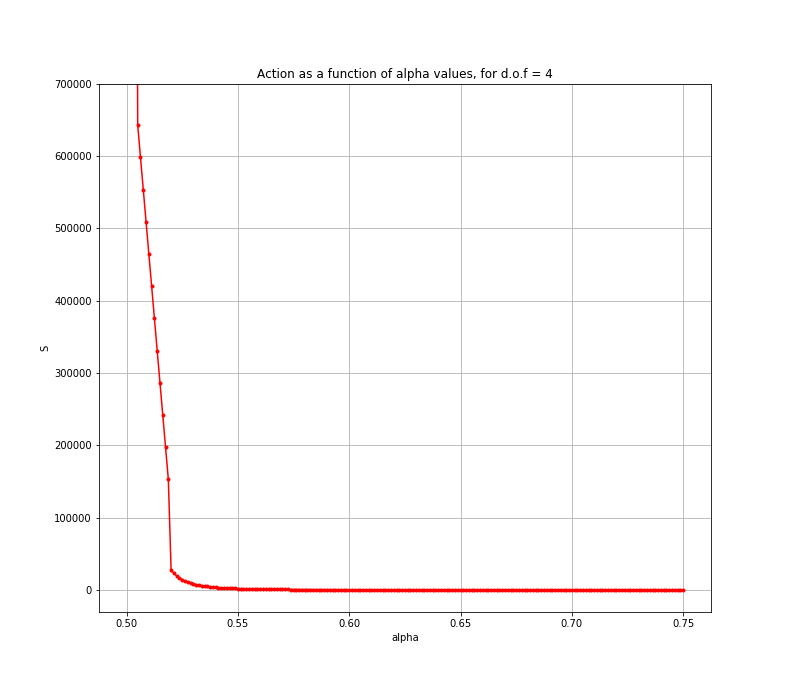

Last 4 values are off screen and the graph *seems* vertical there, as graph asymptoically tends to infinity 
as alpha tends to 0.5


In [33]:
plt.close()
plt.plot(alpha_eff_array, s_vals, 'r.-')
plt.title("Action as a function of alpha values, for d.o.f = 4")
plt.xlabel("alpha")
plt.ylabel("S")
plt.ylim(-30000, 700000)
plt.grid(True)
print("Last 4 values are off screen and the graph *seems* vertical there, as graph asymptoically tends to infinity \nas alpha tends to 0.5")

In [34]:
plt.close()

Great! Now that we have transcribed the data, let us form a template from it.

In [15]:
s_data_dof_3 = []
s_data_dof_4 = []

file2 = open("S_alpha_template_dof_3_S_vals.txt", "r")
for line2 in file2:
    for word2 in line2.split(): 
        s_data_dof_3.append(float(word2))
file2.close()

file2 = open("S_alpha_template_dof_4_S_vals.txt", "r")
for line2 in file2:
    for word2 in line2.split(): 
        s_data_dof_4.append(float(word2))
file2.close()

In [16]:
s_data_dof_3 = np.array(s_data_dof_3)
s_data_dof_4 = np.array(s_data_dof_4)

In [43]:
def func1(x, a, b, c):
    return (a/(x**b)) + c

def func2(x, a, b, c, d):
    return (a/((x - d)**b)) + c

In [44]:
optimum_parameters_dof3_1, covariance_of_parameters_dof3_1 = sco.curve_fit(func1, alpha_eff_array[:-4], s_data_dof_3[:-4], bounds=(0, np.inf))

RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

Okay, that didn't work

In [72]:
optimum_parameters_dof3_2, covariance_of_parameters_dof3_2 = sco.curve_fit(func2, alpha_eff_array[:-4], s_data_dof_3[:-6], bounds=(0, np.inf))

ValueError: operands could not be broadcast together with shapes (197,) (195,) 

Okay, so simply translating it doesn't work. Here's another way to do it.

In [73]:
optimum_parameters_dof3_2, covariance_of_parameters_dof3_2 = sco.curve_fit(func1, alpha_eff_array[:-4] - 0.5, s_data_dof_3[:-4], bounds=(0, np.inf))

In [74]:
#print(optimum_parameters_dof3_1)
print(optimum_parameters_dof3_2)

[6.19472851e-01 1.57974504e+00 6.99101189e-15]


<IPython.core.display.Javascript object>


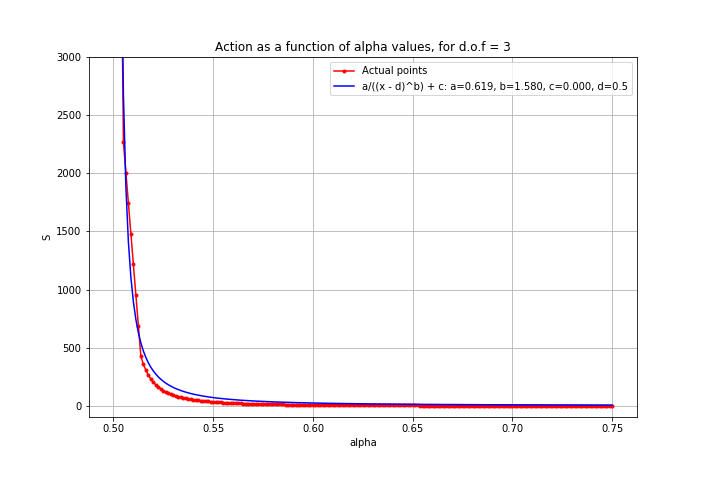

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [75]:
plt.close()
plt.plot(alpha_eff_array, s_data_dof_3, 'r.-', label= "Actual points")
#plt.plot(alpha_eff_array, func1(alpha_eff_array, *optimum_parameters_dof3_1), 'k-',label= "a/(x^b) + c: a=%5.3f, b=%5.3f, c=%5.3f" % tuple(optimum_parameters_dof3_1))
plt.plot(alpha_eff_array, func1(alpha_eff_array - 0.5, *optimum_parameters_dof3_2), 'b-',label= "a/((x - d)^b) + c: a=%5.3f, b=%5.3f, c=%5.3f, d=0.5" % tuple(optimum_parameters_dof3_2))
plt.title("Action as a function of alpha values, for d.o.f = 3")
plt.xlabel("alpha")
plt.ylabel("S")
plt.ylim(-100, 3000)
plt.grid(True)
plt.legend()

In [76]:
plt.close()

In [77]:
optimum_parameters_dof4_1, covariance_of_parameters_dof4_1 = sco.curve_fit(func1, alpha_eff_array[:-4], s_data_dof_4[:-4], bounds=(0, np.inf))

In [35]:
#optimum_parameters_dof4_2, covariance_of_parameters_dof4_2 = sco.curve_fit(func1, alpha_eff_array[:-2], (3000/700000)*s_data_dof_4[:-2], bounds=(0, np.inf))

In [78]:
print(optimum_parameters_dof4_1)

[4.15442309e-12 5.81182061e+01 8.22202731e-10]


<IPython.core.display.Javascript object>


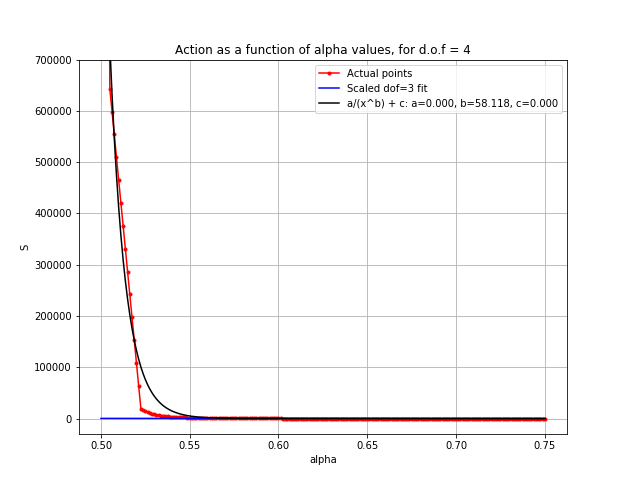

In [81]:
plt.close()
plt.plot(alpha_eff_array, s_data_dof_4, 'r.-', label= "Actual points")
plt.plot(alpha_eff_array, (700000/3000)*func1(alpha_eff_array, *optimum_parameters_dof3_2), 'b-', label="Scaled dof=3 fit")
plt.plot(alpha_eff_array, func1(alpha_eff_array, *optimum_parameters_dof4_1), 'k-', label= "a/(x^b) + c: a=%5.3f, b=%5.3f, c=%5.3f" % tuple(optimum_parameters_dof4_1))
plt.title("Action as a function of alpha values, for d.o.f = 4")
plt.xlabel("alpha")
plt.ylabel("S")
plt.ylim(-30000, 700000)
plt.grid(True)
plt.legend()

In [82]:
plt.close()

Above curve fits look fine, when seen w.r.t. all the values. But it is DEFINITELY not an exact fit.
Perhaps graphs should be curve fit with a piecewise function.

In [83]:
def func3(x, a, b, c):
    return a*np.e**(b/x) + c

def func4(x, a, b, c, d):
    return a*np.e**(-b*x + d) + c

In [84]:
def func5(x, a, b, c, d, e, f, g):
    return a*x**6 + b*x**5 + c*x**4 + d*x**3 + e*x**2 + f*x + g

In [85]:
popt_dof3_1, copt_dof3_1 = sco.curve_fit(func1, alpha_eff_array[100:186], s_data_dof_3[100:186])

In [86]:
popt_dof3_2, copt_dof3_2 = sco.curve_fit(func1, alpha_eff_array[:120], s_data_dof_3[:120], bounds=(0, np.inf))

In [87]:
popt_dof3_3, copt_dof3_3 = sco.curve_fit(func1, alpha_eff_array[120:-4], s_data_dof_3[120:-4])

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [88]:
popt_dof3_4, copt_dof3_4 = sco.curve_fit(func5, alpha_eff_array[:-4], s_data_dof_3[:-4])

In [89]:
popt_dof3_5, copt_dof3_5 = sco.curve_fit(func5, alpha_eff_array[:120], s_data_dof_3[:120])

In [90]:
popt_dof3_6, copt_dof3_6 = sco.curve_fit(func5, alpha_eff_array[100:186], s_data_dof_3[100:186])

In [91]:
print(popt_dof3_1)
print(popt_dof3_2)
#print(popt_dof3_3)
print(popt_dof3_4)
print(popt_dof3_5)
print(popt_dof3_6)

[9.47366937e-10 3.97832112e+01 8.69642502e+00]
[2.68425428e-03 1.55970220e+01 1.83562384e-26]
[ 1.24542761e+09 -4.78168745e+09  7.62747734e+09 -6.47011811e+09
  3.07811937e+09 -7.78692290e+08  8.18342566e+07]
[-107498.42596756  302388.43243737 -262880.27609927   -8760.05122078
  141455.50935115  -79123.71703826   14020.88622061]
[-2.22325253e+08  5.17941333e+08 -3.76903155e+08  7.42207380e+04
  1.27442238e+08 -5.92644219e+07  8.60775969e+06]


<IPython.core.display.Javascript object>


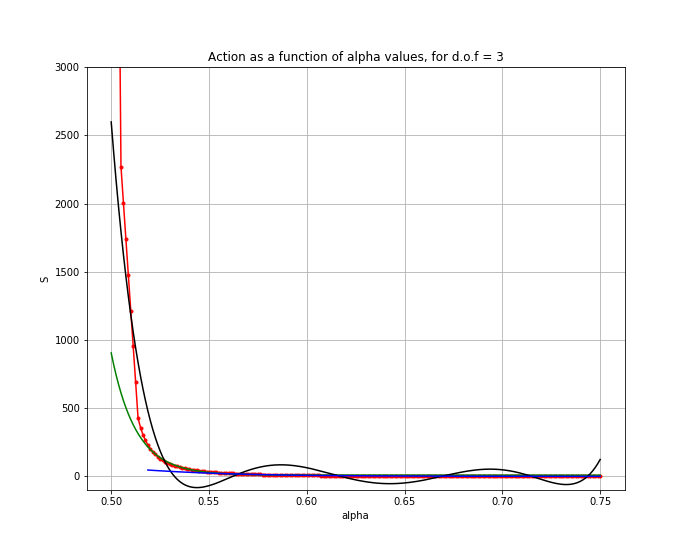

In [96]:
plt.close()
plt.plot(alpha_eff_array, s_data_dof_3, 'r.-', label= "Actual points")
plt.plot(alpha_eff_array[:], func1(alpha_eff_array[:], *popt_dof3_1), 'g-')
#plt.plot(alpha_eff_array[:186], func1(alpha_eff_array[:186], *popt_dof3_2), 'b-')
#plt.plot(alpha_eff_array[:-4], func1(alpha_eff_array[:-4], *popt_dof3_3), 'k-')
plt.plot(alpha_eff_array[:], func5(alpha_eff_array[:], *popt_dof3_4), 'k-')
plt.plot(alpha_eff_array[:186], func5(alpha_eff_array[:186], *popt_dof3_5), 'b-')
#plt.plot(alpha_eff_array[:-4], func5(alpha_eff_array[:-4], *popt_dof3_6), 'g-')
plt.title("Action as a function of alpha values, for d.o.f = 3")
plt.xlabel("alpha")
plt.ylabel("S")
plt.ylim(-100, 3000)
plt.grid(True)
#plt.legend()

In [97]:
plt.close()

This fits considerably better than the whole graph curve fits.

But it was both tedious and still rather ineffective.

Now attempting different interpolation methods:

In [17]:
x_new = np.linspace(0.5, 0.75, 1000)

In [18]:
a = sci.interp1d(alpha_eff_array[::-1], s_data_dof_3[::-1]) #this is equivalent to weighted average

In [19]:
b = sci.pchip_interpolate(alpha_eff_array[::-1], s_data_dof_3[::-1], x_new) #this works the same way as d

In [20]:
c = sci.Akima1DInterpolator(alpha_eff_array[::-1], s_data_dof_3[::-1]) #not as effective as d

In [21]:
d = sci.PchipInterpolator(alpha_eff_array[::-1], s_data_dof_3[::-1])

In [22]:
j = sci.BarycentricInterpolator(alpha_eff_array[::-1], s_data_dof_3[::-1])

<IPython.core.display.Javascript object>


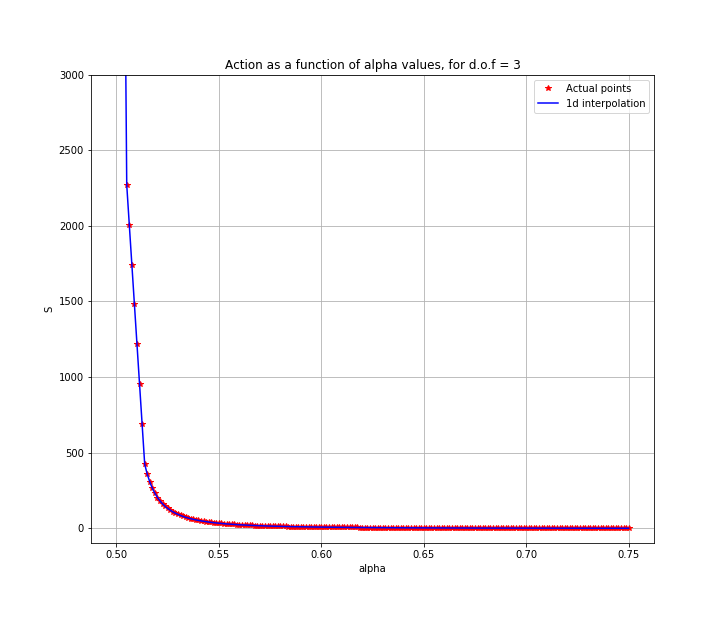

In [23]:
plt.close()
plt.plot(alpha_eff_array, s_data_dof_3, 'r*', label= "Actual points")
plt.plot(x_new, a(x_new), 'b-', label="1d interpolation")
#plt.plot(x_new, b, 'g-', label="PCHIP_interpolate")
#plt.plot(x_new, c(x_new), 'm-', label="Akima")
#plt.plot(x_new, d(x_new), 'g-', label="PCHIP")
#plt.plot(x_new, j(x_new), 'k-', label="Barycentric")
plt.title("Action as a function of alpha values, for d.o.f = 3")
plt.xlabel("alpha")
plt.ylabel("S")
plt.ylim(-100, 3000)
plt.grid(True)
plt.legend()

In [24]:
plt.close()

In [25]:
s3_vals = list(s_data_dof_3[:len(a1_3)])
for y in s_data_dof_3[find_index1:]:
    s3_vals.append(y)
s3_vals = np.array(s3_vals[::-1])

a3_vals = a1_3[:]
for x in a2_3:
    a3_vals.append(x)

a3_vals = np.array(a3_vals[::-1])

In [26]:
h = sci.PchipInterpolator(a3_vals, s3_vals)

<IPython.core.display.Javascript object>


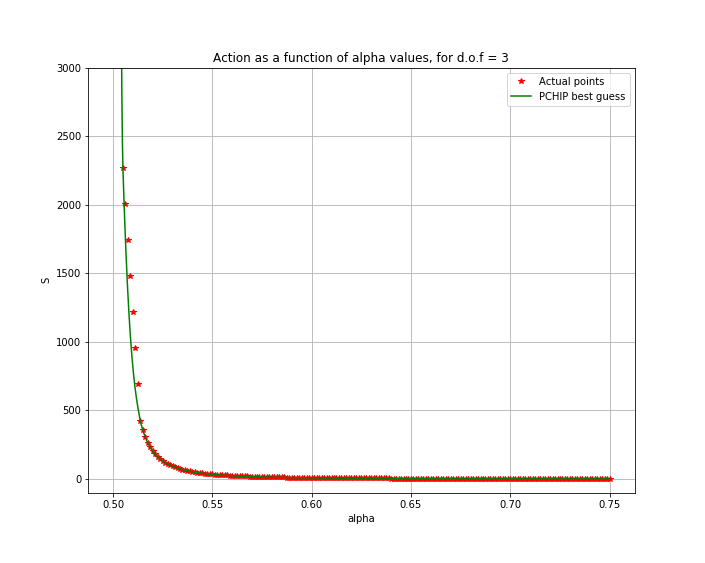

In [27]:
plt.close()
plt.plot(alpha_eff_array, s_data_dof_3, 'r*', label= "Actual points")
plt.plot(x_new, h(x_new), 'g-', label="PCHIP best guess")
plt.title("Action as a function of alpha values, for d.o.f = 3")
plt.xlabel("alpha")
plt.ylabel("S")
plt.ylim(-100, 3000)
plt.grid(True)
plt.legend()

In [28]:
plt.close()

In [29]:
s3_vals2 = list(s_data_dof_3[:len(a1_4)])
for y in s_data_dof_3[find_index1:]:
    s3_vals2.append(y)
s3_vals2 = np.array(s3_vals2[::-1])

a3_vals2 = a1_4[:]
for x in a2_4:
    a3_vals2.append(x)

a3_vals2 = np.array(a3_vals2[::-1])

In [30]:
l = sci.PchipInterpolator(a3_vals2, s3_vals2)

<IPython.core.display.Javascript object>


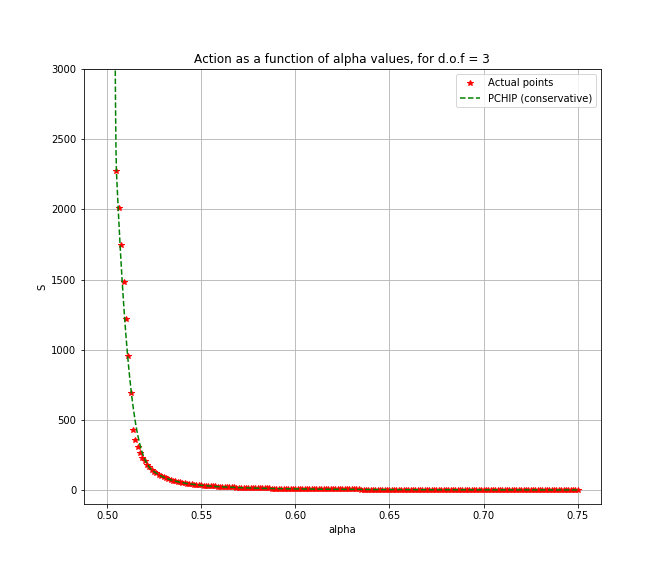

In [31]:
plt.close()
plt.plot(alpha_eff_array, s_data_dof_3, 'r*', label= "Actual points")
plt.plot(x_new, l(x_new), 'g--', label="PCHIP (conservative)")
plt.title("Action as a function of alpha values, for d.o.f = 3")
plt.xlabel("alpha")
plt.ylabel("S")
plt.ylim(-100, 3000)
plt.grid(True)
plt.legend()

In [32]:
plt.close()

In [33]:
m = sci.PchipInterpolator(alpha_eff_array[::-1], s_data_dof_3[::-1])

<IPython.core.display.Javascript object>


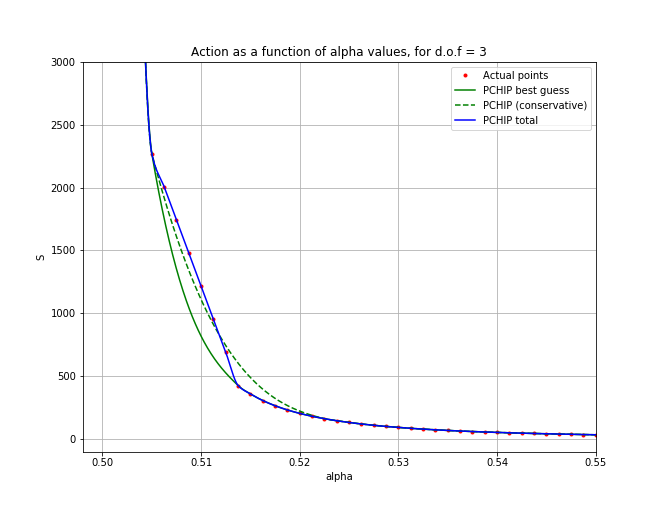

In [34]:
x_test = np.linspace(0.5, 0.55, 1000)

plt.close()
plt.plot(alpha_eff_array, s_data_dof_3, 'r.', label= "Actual points")
#plt.plot(x_test, a(x_test), 'r-', label="1d interpolation")
plt.plot(x_test, h(x_test), 'g-', label="PCHIP best guess")
plt.plot(x_test, l(x_test), 'g--', label="PCHIP (conservative)")
plt.plot(x_test, m(x_test), 'b-', label="PCHIP total")

plt.title("Action as a function of alpha values, for d.o.f = 3")
plt.xlabel("alpha")
plt.ylabel("S")
plt.ylim(-100, 3000)
plt.xlim(0.498, 0.55)
plt.grid(True)
plt.legend()

In [35]:
plt.close()

<IPython.core.display.Javascript object>


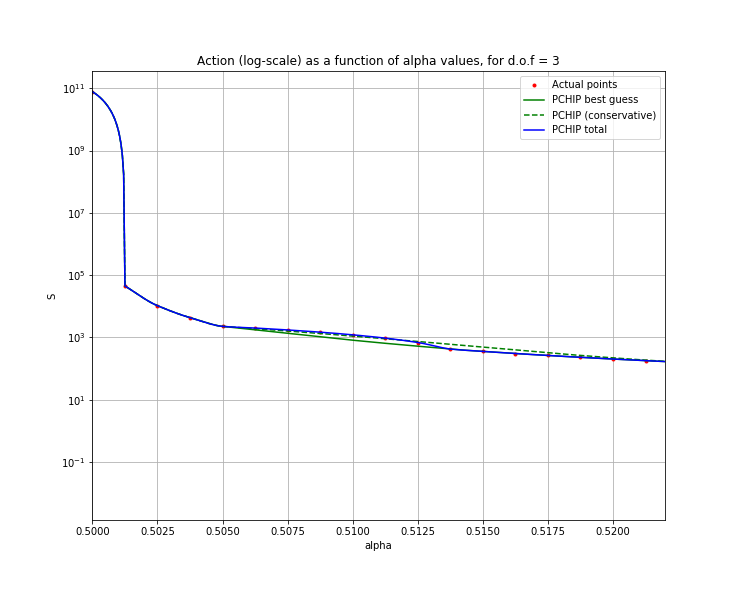

In [38]:
plt.close()
plt.semilogy(alpha_eff_array, s_data_dof_3, 'r.', label= "Actual points")
#plt.semilogy(x_test, a(x_test), 'r-', label="1d interpolation")
plt.semilogy(x_test, h(x_test), 'g-', label="PCHIP best guess")
plt.semilogy(x_test, l(x_test), 'g--', label="PCHIP (conservative)")
plt.semilogy(x_test, m(x_test), 'b-', label="PCHIP total")

plt.title("Action (log-scale) as a function of alpha values, for d.o.f = 3")
plt.xlabel("alpha")
plt.ylabel("S")
#plt.ylim(-100, 3000)
plt.xlim(0.5, 0.522)
plt.grid(True)
plt.legend()

In [39]:
plt.close()

In [40]:
s4_vals = list(s_data_dof_4[:len(a1_4)])
for y in s_data_dof_4[find_index1:]:
    s4_vals.append(y)
s4_vals = np.array(s4_vals[::-1])

a4_vals = a1_4[:]
for x in a2_4:
    a4_vals.append(x)

a4_vals = np.array(a4_vals[::-1])

In [41]:
i = sci.PchipInterpolator(a4_vals, s4_vals)

In [42]:
k = sci.interp1d(alpha_eff_array[::-1], s_data_dof_4[::-1])

<IPython.core.display.Javascript object>


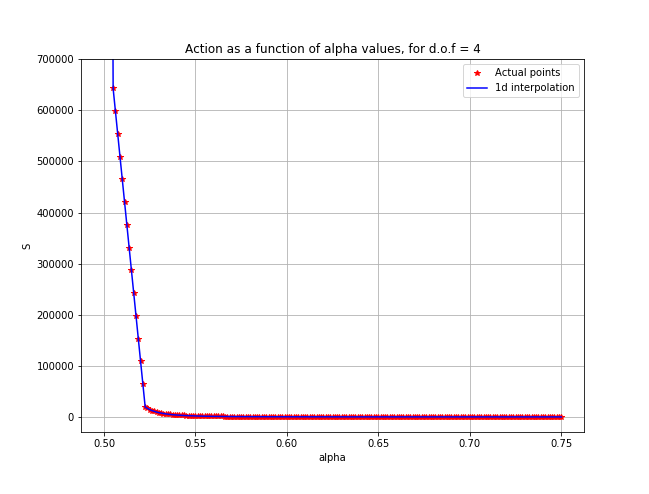

In [43]:
plt.close()
plt.plot(alpha_eff_array, s_data_dof_4, 'r*', label= "Actual points")
plt.plot(x_new, k(x_new), 'b-', label="1d interpolation")
plt.title("Action as a function of alpha values, for d.o.f = 4")
plt.xlabel("alpha")
plt.ylabel("S")
plt.ylim(-30000, 700000)
plt.grid(True)
plt.legend()

In [44]:
plt.close()

In [45]:
n = sci.PchipInterpolator(alpha_eff_array[::-1], s_data_dof_4[::-1])

<IPython.core.display.Javascript object>


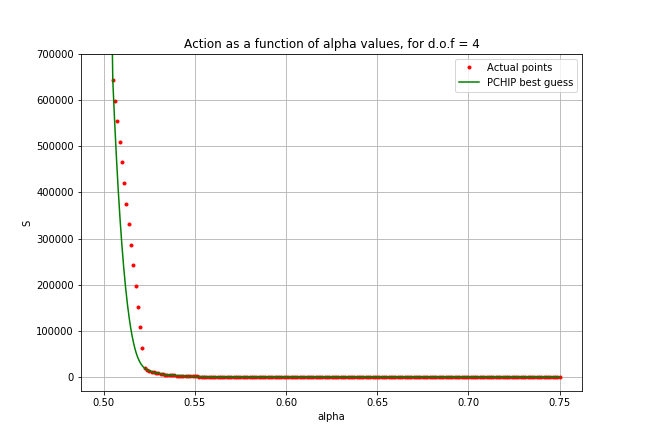

In [46]:
plt.close()
plt.plot(alpha_eff_array, s_data_dof_4, 'r.', label= "Actual points")
plt.plot(x_new, i(x_new), 'g-', label="PCHIP best guess")
#plt.plot(x_new, n(x_new), 'b-', label="PCHIP total")
plt.title("Action as a function of alpha values, for d.o.f = 4")
plt.xlabel("alpha")
plt.ylabel("S")
plt.ylim(-30000, 700000)
plt.grid(True)
plt.legend()

In [47]:
plt.close()

<IPython.core.display.Javascript object>


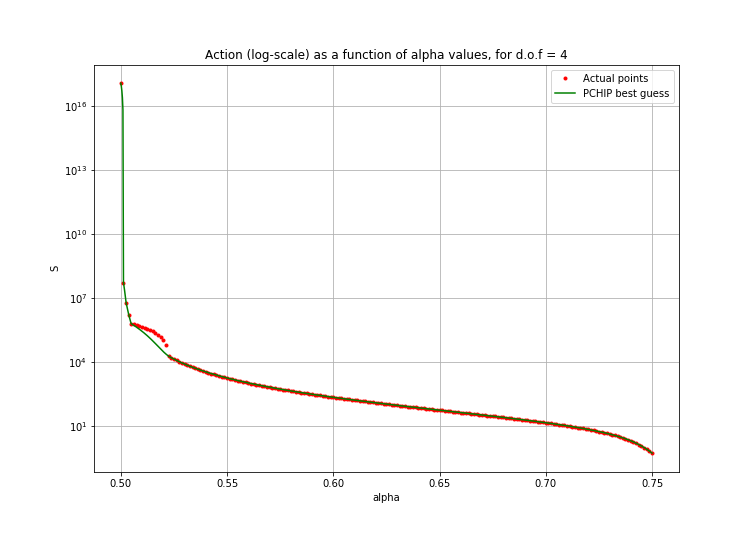

In [48]:
plt.close()
plt.semilogy(alpha_eff_array, s_data_dof_4, 'r.', label= "Actual points")
plt.semilogy(x_new, i(x_new), 'g-', label="PCHIP best guess")
#plt.semilogy(x_new, n(x_new), 'b-', label="PCHIP total")
plt.title("Action (log-scale) as a function of alpha values, for d.o.f = 4")
plt.xlabel("alpha")
plt.ylabel("S")
plt.grid(True)
plt.legend()

In [49]:
plt.close()